## Day 05 - KNN Regressor
**7-Dec-2021, Tuesday**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dirpath = "../data/knn/regression/"
X = np.load(dirpath+"X_data.npy")
y = np.load(dirpath+"Y_data.npy")
print(X.shape, y.shape)

(50, 1) (50,)


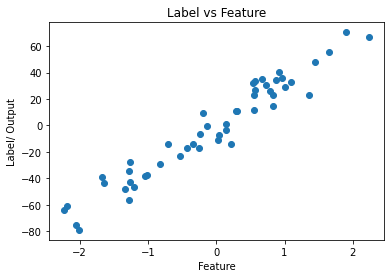

In [4]:
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Label/ Output")
plt.title("Label vs Feature")
plt.show()

In [12]:
class KNNregressor:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, Xtrain, ytrain):
        self.xtrain = Xtrain
        self.ytrain = ytrain
        
    def predict(self, X_test):
        prediction = np.empty((len(X_test)))
        idx = []
        for i in range(len(X_test)):
            # compute the distance
            distance = np.linalg.norm(X_test[i] - self.xtrain, ord=2, axis=1)
            knn_idx = np.argsort(distance)[:self.k]
            idx.append(knn_idx)
            prediction[i] = self.ytrain[knn_idx].mean()
        return prediction, idx

In [13]:
model = KNNregressor()
model.fit(X, y)
test_point = np.array([[0.45]])
print(test_point)
pred, knn_idx = model.predict(test_point)
print(pred, knn_idx)

[[0.45]]
[22.41368721] [array([34, 43, 14], dtype=int64)]


In [16]:
type(knn_idx), type(knn_idx[0]), knn_idx[0]

(list, numpy.ndarray, array([34, 43, 14], dtype=int64))

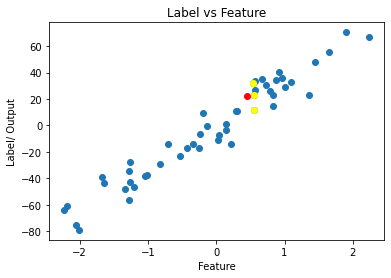

In [25]:
plt.scatter(X, y)
plt.scatter(test_point, pred, c="red")
plt.scatter(X[knn_idx[0]], y[knn_idx[0]], c='yellow') # nearest points to my X_test
plt.xlabel("Feature")
plt.ylabel("Label/ Output")
plt.title("Label vs Feature")
plt.show()

In [23]:
idx = [34, 43, 14]
X[idx]

array([[0.54500464],
       [0.54820748],
       [0.55003505]])

In [24]:
y[idx]

array([32.40155139, 23.15440311, 11.68510712])

## Plotting prediction line

In [38]:
model = KNNregressor(k=3)
model.fit(X, y)
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 100).reshape(-1,1)
print(f1.shape)
prediction = model.predict(f1)[0]
print(prediction.shape)

(100, 1)
(100,)


Text(0.5, 1.0, 'Label vs Feature, (K=3)')

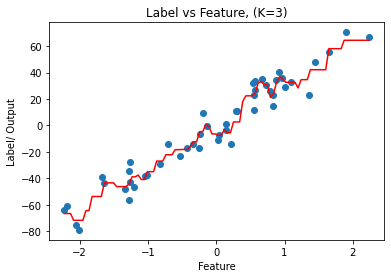

In [39]:
plt.scatter(X, y)
plt.plot(f1, prediction, c='red')
plt.xlabel("Feature")
plt.ylabel("Label/ Output")
plt.title(f"Label vs Feature, (K={model.k})")

### Sklearn

In [40]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [41]:
knnr = KNeighborsRegressor()
knnr.fit(X, y)
pred = knnr.predict(X)
print(pred.shape)

(50,)


In [43]:
pred

array([-63.54978048, -63.54978048,  34.58064063,  -4.31615606,
        25.71726167, -63.54978048, -28.49957336,  52.79687242,
        52.79687242,  25.53201326, -15.52262574,  -7.05622892,
       -41.45016547,  -7.05622892,  25.53201326, -41.7441446 ,
       -35.80937315, -41.45016547, -24.29497191, -53.14209469,
       -41.7441446 , -19.5242773 ,  29.56248143, -56.90099784,
        37.76564004,   1.10822167,  32.50602481,  -4.31615606,
        -5.62408137, -41.7441446 ,  -5.62408137,  34.58064063,
        -5.09011485, -63.54978048,  25.53201326,  27.72285871,
         1.10822167, -41.45016547,  32.50602481,  -5.62408137,
        37.76564004,  -9.01136688,  30.61177034,  25.53201326,
         1.10822167,  25.71726167,  46.03841992, -38.52724635,
        25.53201326,  25.98424384])

In [ ]:
knnc = KNeighborsClassifier()
knnc.fit(Xtrain, ytrain)
knnc.predict(X_test)

In [42]:
KNeighborsClassifier?